In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:

def histogram_equalization(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Calculate histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize CDF
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # Create lookup table
    lut = np.interp(np.arange(256), np.arange(256), cdf_normalized.ravel())
    
    # Apply histogram equalization
    equalized = lut[gray]
    equalized = np.uint8(equalized)
    
    return equalized

# Load an image
image = cv2.imread('lena.png')

# Perform histogram equalization
equalized = histogram_equalization(image)

# Calculate histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])


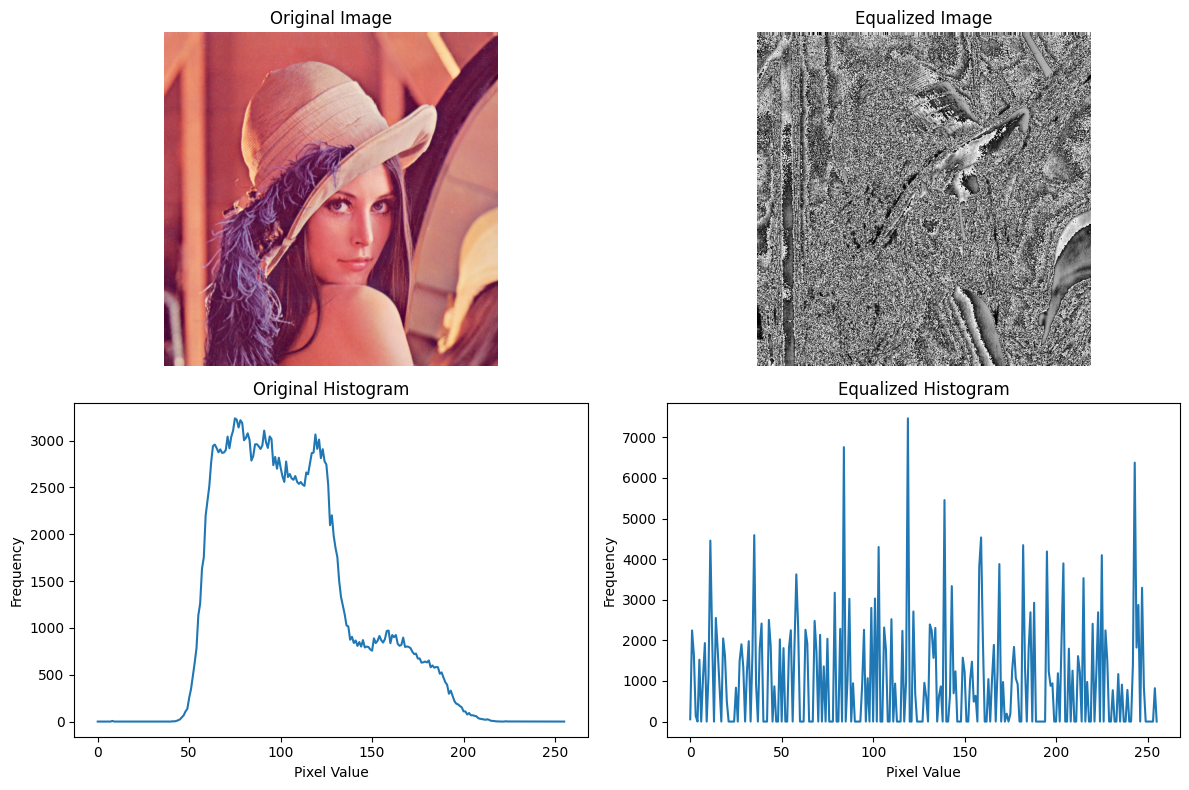

In [5]:

# Plotting
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()